<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [57]:
import pandas as pd
edge_table = pd.read_csv('twitter_combined.txt', sep = ' ',
                        header= None)

In [26]:
edge_table.columns = ['origin_id', 'follower_id']
sample = list(edge_table.sample(5)['origin_id'])

In [35]:
edge_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420766 entries, 0 to 2420765
Data columns (total 2 columns):
 #   Column       Dtype
---  ------       -----
 0   origin_id    int64
 1   follower_id  int64
dtypes: int64(2)
memory usage: 36.9 MB


In [43]:
from queue import Queue
MAX_DEPTH = 2
CUR_MAX_DEPTH = -1
i = 0
follower_db = []

seed_id = 25577874
user_q = Queue()
user_q.put((seed_id, 0))
while not user_q.empty():
    current_user, current_depth = user_q.get()
    if current_depth > CUR_MAX_DEPTH:
        print(current_depth)
        CUR_MAX_DEPTH = current_depth
        
    if current_depth <= MAX_DEPTH:
        cu_followers = list(edge_table.loc[edge_table['origin_id'] == current_user, 'follower_id'])[0:50]
        if len(cu_followers) < 1001:
            for follower in cu_followers:
                user_q.put((follower, current_depth + 1))
                follower_db.append((current_user, follower))
    else:
        continue

0
1
2
3


In [59]:
follower_db = list(edge_table.to_records(index = False))

In [60]:
G = nx.Graph()

In [61]:
G.add_edges_from(follower_db)

In [62]:
G.number_of_nodes()

81306

In [63]:
G.number_of_edges()

1342310

In [85]:
import numpy as np
node_deg = [np.log(d) for n, d in G.degree()]

In [86]:
import seaborn as sns

In [ ]:
i = 0
for A, B in G.edges():
    i += 1
    if i < 1000:
            

<AxesSubplot:>

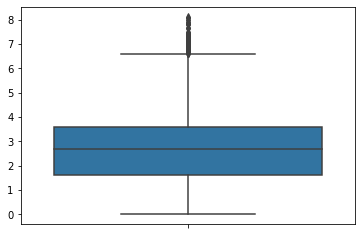

In [87]:
sns.boxplot(y=node_deg) # the rich get richer

In [ ]:
# comunalidade
# criar uma função que a partir de 2 usuários A e B
# calcular a % de seguidores de A que também seguem B
# calcular a % de seguidores de B que também seguem A

In [ ]:
# calcular indice de comunalidade para todos(ou alguns?) os elos

In [ ]:
# vizualizar distribuição de comunalidade para todos os elos

In [ ]:
# será que a existe uma relação entre a comunalidade entre A e B (B e A) e o grau de A/B?

In [ ]:
# Quantos elos você adicionaria se fizesse recomendassões com base neste indice?